In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
def tot(time, ch):
    half= max(ch)/2
    i=0
    while ch[i]<half:
        i=i+1
    j=i+30
    while ch[j]>half:
        j=j+1
    tott= time[j]-time[i]
    return tott


In [3]:
folder=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/calbritationr2c2/*")
folder= sorted(folder)
file= glob.glob("{}/*".format(folder[1]))

len(folder)


8

In [4]:
lol=7


file= glob.glob("{}/*".format(folder[lol]))


data=h5py.File(file[lol])
print(data.keys())
data=data["Waveforms"]
print(data.keys())
ch1= data["Channel 1"]
ch1= ch1["Channel 1Data"]
ch1= np.array(ch1)

print(ch1)

<KeysViewHDF5 ['FileType', 'Frame', 'Waveforms']>
<KeysViewHDF5 ['Channel 1', 'Channel 2']>
[ 1.8086735   1.808801    1.8084184  ... -0.03858418 -0.03871173
 -0.0380102 ]


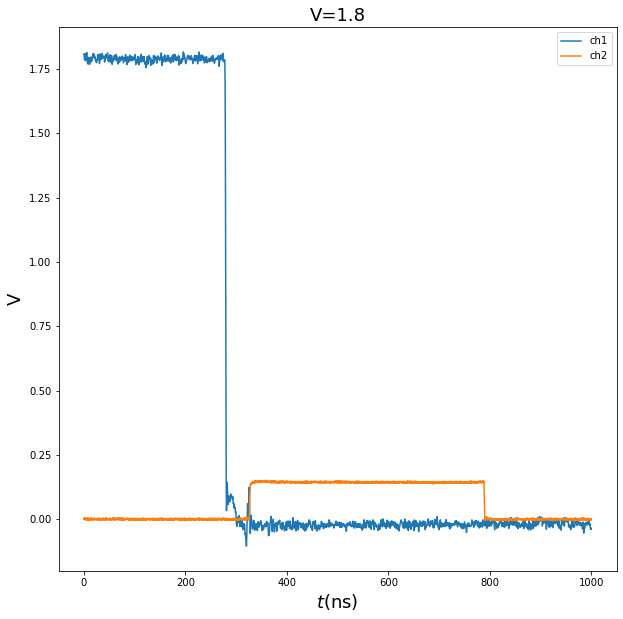

In [5]:
lol=7


file= glob.glob("{}/*".format(folder[lol]))


data=h5py.File(file[lol])
data=data["Waveforms"]
ch1= data["Channel 1"]
ch2= data["Channel 2"]
ch1= ch1["Channel 1Data"]
ch1= np.array(ch1)
ch2= ch2["Channel 2Data"]
ch2= np.array(ch2)

time= np.linspace(0,((1/(8.001*10**9))*16001)*10**9/2, 16001)


fig = plt.figure(figsize=(10,10))
plt.plot(time,ch1, label="ch1")
plt.plot(time,ch2, label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=1.8",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()



In [6]:
def tot(time, ch):
    half= (max(ch)-min(ch))/2 + min(ch) #find half point of the rise
    i=0
    while ch[i]<half: #find the element which is higher then the halfpoint
        i=i+1
    x1= [time[i-1],time[i]]
    y1= [ch[i-1],ch[i]]
    xnew1= np.linspace(time[i-1],time[i],200)
    f1 = interp1d(x1, y1)#linearly interpolate of these two points
    ynew1= f1(xnew1)
    k=0
    while ynew1[k]<half:
        k=k+1#find the right point of the interpolation
    j=i+30 #no do the same for the falling edge
    while ch[j]>half:
        j=j+1
    
    x2= [time[j-1],time[j]]
    y2= [ch[j-1],ch[j]]
    xnew2= np.linspace(time[j-1],time[j],200)
    f2 = interp1d(x2, y2)
    ynew2= f2(xnew2)
    z=0
    while ynew2[z]<half:
        z=z+1
    tott= xnew2[z]- xnew1[k]#calculate the tot
    return tott



In [7]:
462.28360908011496

462.28360908011496

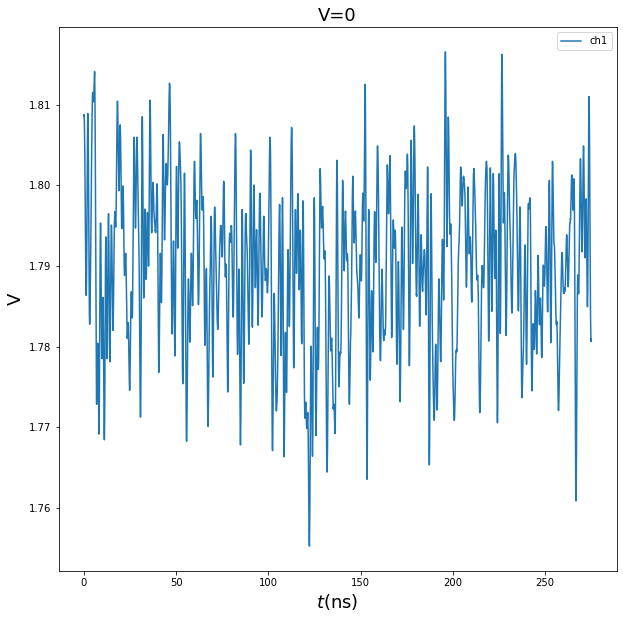

In [8]:
fig = plt.figure(figsize=(10,10))
plt.plot(time[0:4400],ch1[0:4400], label="ch1")
#plt.plot(time[0:1200],ch2[0:1200], label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=0",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()


In [9]:
def timedif(ch1,ch2,time):
    minimal=min(ch1[0:4400])*1.05
    i=0
    while ch1[i]>= minimal:
        i=i+1
    rise= max(ch2)/2
    j=0
    while ch2[j]<= rise:
        j=j+1
    dt= time[j]-time[i] 
    
    return dt




print(timedif(ch1,ch2,time))

326.91706896013


In [10]:
tot(time,ch2)

462.36180771059395

In [11]:
folder[0]

'/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/calbritationr2c2/pixelr2c2_B100V_P0_44V'

In [12]:
files=[]
for i in range(len(folder)):
    files.append(glob.glob("{}/*".format(folder[i])))

len(files)

8

files=[]
for i in range(8,16):
    files.append(glob.glob("{}/*".format(folder[i])))


In [13]:
%%time
multipeak=[]
dts=[]
tots=[]
diffs=[]
for j in range(len(files)):
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    for i in range(len(files[j])):
        data=h5py.File(files[j][i])
        data1=data["Waveforms"]
        ch1= data1["Channel 1"]
        ch2= data1["Channel 2"]
        ch1= ch1["Channel 1Data"]
        ch1= np.array(ch1)
        ch2= ch2["Channel 2Data"]
        ch2= np.array(ch2)
        temp1.append(timedif(ch1,ch2,time))
        tot1=(tot(time,ch2))
        temp2.append(tot1)
        data.close()
    dts.append(temp1)
    tots.append(temp2)
    multipeak.append(temp3)
    diffs.append(temp4)
    
    print(j)


0
1
2
3
4
5
6
7
CPU times: user 6min 3s, sys: 1.46 s, total: 6min 4s
Wall time: 6min 7s


NameError: name 'totmean' is not defined

In [15]:
v=[0.44,0.59,0.79,0.99,1.19,1.39,1.59,1.79]


In [16]:
totmean=[]
totsd=[]
for i in range(len(tots)):
    totmean.append(np.mean(tots[i]))
    totsd.append(np.std(tots[i]))


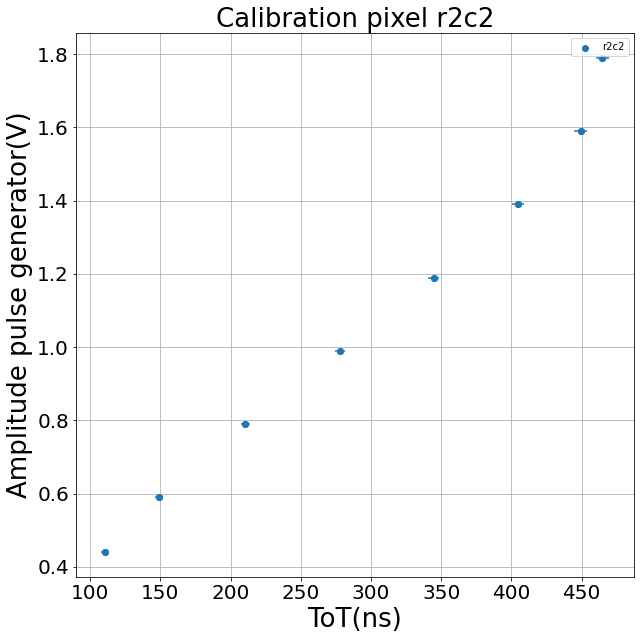

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(totmean,v, label="r2c2")
plt.errorbar(totmean, v, xerr=totsd, fmt='o')
plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Amplitude pulse generator(V)",fontsize=26)
plt.title("Calibration pixel r2c2",fontsize=26)
plt.xlabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [18]:
electrons=[]
c=6.24*10**18
cont=(2.8*10**-15)*c
for i in range(len(v)):
    d=v[i]*cont
    electrons.append(d)
    


In [19]:
m,b = np.polyfit(electrons,totmean,1)
y=[]
for i in range(len(electrons)):
    y.append(electrons[i]*m + b)


In [21]:
totsd

[2.5365887486846517,
 2.926842376207636,
 3.2484248627327834,
 3.5932685965813342,
 4.152396155663297,
 4.288187037987365,
 4.586286542379113,
 4.47261326654073]

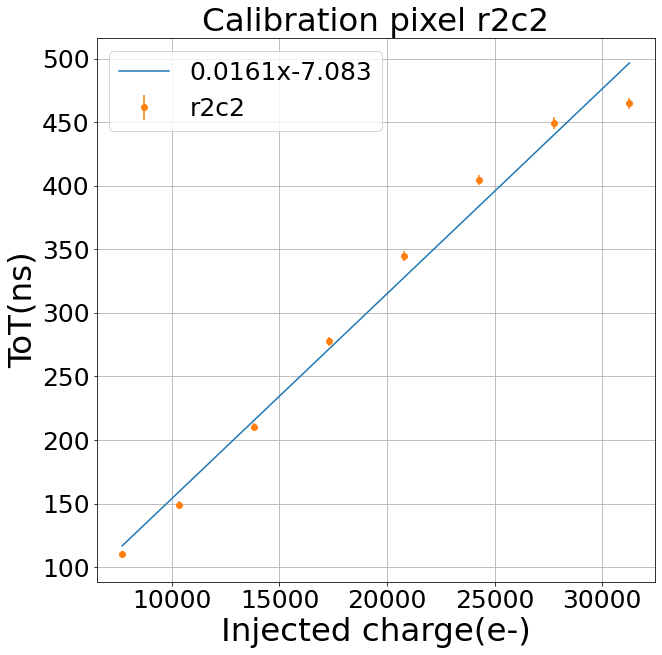

In [20]:
fig = plt.figure(figsize=(10,10))
plt.plot(electrons, y, label="0.0161x-7.083")
plt.errorbar(electrons, totmean, yerr=totsd, fmt='o',label="r2c2")

fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26*1.25)
plt.title("Calibration pixel r2c2",fontsize=26*1.25)
plt.ylabel("ToT(ns)",fontsize=26*1.25)
plt.xticks(fontsize=20*1.25)
plt.yticks(fontsize=20*1.25)
plt.grid()
plt.legend(fontsize=20*1.25)

plt.show()

In [ ]:
for i in range(len(dts)):
    print(np.std(dts[i]))

In [ ]:
cont*2.5

In [ ]:
data=h5py.File("20221011-181608_10.h5")
data.keys()
time= data["Time"]
volt= data["Voltage"]
time=np.array(time)
volt= np.array(volt)



fig = plt.figure(figsize=(10,10))
plt.plot(time,volt, label="ch1")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=1.8",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()
